# WeRateDogs Twitter Data Wrangling

### Table of Contents
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#visualize">Analyzing and Visualizing Data</a></li>
</ol>

<a id="intro"></a>
# Introduction

Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. Today our main question is: How did WeRateDogs (@dog_rates) tweet frequency affect the account growth and community engagement.

### Twitter Archive
1. **tweet_id** - The integer representation of the unique identifier for this Tweet.
2. **in_reply_to_status_id** - If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.
3. **in_reply_to_user_id** - If the represented Tweet is a reply, this field will contain the original Tweet’s author ID.
4. **timestamp** - The creation time of the Tweet.
5. **source** - The name of the app the user Tweeted from.
6. **text** - The actual UTF-8 text of the Tweet.
7. **retweeted_status_id** - If the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
8. **retweeted_status_user_id** - If the represented Tweet is a retweet, this field will contain the original Tweet’s author ID.
9. **retweeted_status_timestamp** - The creation time of the retweet.
10. **expanded_urls** - An expanded version of display_url/ URL of the media to display to clients.
11. **rating_numerator** - numerator on the dog rating.
12. **rating_denominator** - denominator on the dog rating.
13. **name** - Name of the dog.
14. **doggo, floofer, pupper, and puppo** - These columns represent dog stages.

### Twitter Predictions
1. **tweet_id** - The integer representation of the unique identifier for this Tweet.
2. **jpg_url** - Image URL.
3. **img_num** - number of images in a tweet.
4. **p1** - The algorithm's #1 prediction for the image in the tweet.
5. **p1_conf** - is whether or not the #1 prediction is a breed of dog.
6. **p1_dog** - is whether or not the #1 prediction is a breed of dog.
7. **p2** - The algorithm's #2 prediction for the image in the tweet.
8. **p2_conf** - is whether or not the #2 prediction is a breed of dog.
9. **p2_dog** - is whether or not the #2 prediction is a breed of dog.
10. **p3** - The algorithm's #3 prediction for the image in the tweet.
11. **p3_conf** - is whether or not the #3 prediction is a breed of dog.
12. **p3_dog** - is whether or not the #3 prediction is a breed of dog.

### Twitter API
1. **tweet_id**	- The integer representation of the unique identifier for this Tweet.
2. **retweet_count** - Number of times this Tweet has been retweeted.
3. **favorite_count** -  Indicates approximately how many times this Tweet has been liked by Twitter users.
4. **followers_count** - The number of followers this account currently has.

<a id="gather"></a>
# Step 1: Gathering Data

### Imports

In [3]:
# importing all libraries I will use.
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline
import tweet_auth

### Read the file 'twitter-archive-enhanced.csv' using pandas DataFrame.

In [5]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

Print a sample of the twitter-archieve sample using DataFrame.sample()

In [6]:
# Using DataFrame.head to print the first five rows of the dataframe.
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Downloading 'image_predictions.tsv' programmatically using the Requests library and read the data using pandas DataFrame. 

In [7]:
# Sends a GET request.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Check if GET request response status code is OK or 200.
if response.status_code == 200:
    # if status code is OK, open write or create a file and write alll the response content in it.
    with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)
else:
    print('Incorrect URL or file does not exist.')

# Create a prediction dataframe using the downloaded file.
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t', encoding='utf-8')

Print the 'image-predictions.tsv' dataframe using DataFrame.head()

In [8]:
# Using DataFrame.head to print the first five rows of the dataframe.
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Accessing the Twitter API to get additional data using the referrenced tweets in df_archive - tweet_id's

Authenticate to the twitter API using the tweepy library.

In [9]:
# Authenticate to the twitter API using the tweepy.OAuthHandler
auth = tweepy.OAuthHandler(tweet_auth.consumer_key, tweet_auth.consumer_secret)
auth.set_access_token(tweet_auth.access_token, tweet_auth.access_token_secret)

# Create a Twitter API interface using the, json parser as response for our queries, and wait on rate limit.
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

Create or open `tweet_json.txt` file and write all good twitter response

In [10]:
# Create or open tweet_json.txt file and write all good twitter response
# If api.get_status returns a error write the tweet_it into error_tweets.
def get_tweet_status(data, mode:str, e_tweet: list):
  e_tweet = e_tweet
  start = time.time()
  with open(r'tweet_json.txt', mode=mode) as file:
      for tweet in data:
          try:
              tweet_response = api.get_status(id=tweet, tweet_mode='extended')
              file.write(json.dumps(tweet_response) + "\n")
          except:
              e_tweet.append(tweet)
  end = time.time()
  dicts = {}
  return {'start': start,
          'end': end,
          'e_tweet': e_tweet}

error_tweets = []
tweets = get_tweet_status(df_archive.tweet_id, mode='w', e_tweet=error_tweets)

In [11]:
print("There are ", len(tweets['e_tweet']), " tweets with errors.")

There are  33  tweets with errors.


Re-run the error tweet_ids to get the extra tweets and append the tweet_json.txt with the good twitter response tweets using tweet_ids from `tweets['e_tweet']`

In [12]:
# Create or open tweet_json.txt file and write all good twitter response
# If api.get_status returns a error write the tweet_it into e_tweets.
tweets = get_tweet_status(tweets['e_tweet'], mode='a', e_tweet=[])

Print out the tweets with errors.

In [13]:
print("There are ", len(tweets['e_tweet']), " tweets with errors.")
print(tweets['e_tweet'])

There are  30  tweets with errors.
[888202515573088257, 877611172832227328, 873697596434513921, 872668790621863937, 872261713294495745, 869988702071779329, 866816280283807744, 861769973181624320, 856602993587888130, 856330835276025856, 851953902622658560, 851861385021730816, 845459076796616705, 844704788403113984, 842892208864923648, 837366284874571778, 837012587749474308, 829374341691346946, 827228250799742977, 812747805718642688, 802247111496568832, 779123168116150273, 775096608509886464, 771004394259247104, 770743923962707968, 766864461642756096, 759923798737051648, 759566828574212096, 754011816964026368, 680055455951884288]


Write the error tweets to a file called `'error_ids.txt'`

In [14]:
with open(r'error_ids.txt', mode='w') as file:
    for id in tweets['e_tweet']:
        file.write(str(id) + "\n")

Read all the content in the 'tweet_json.txt' file and save tweet_id, retweet_count, favorite_count, and followers_count to a DataFrame

In [15]:
# Open 'tweet_json.txt' file in read mode
# Read 'tweet_json.txt' to get the json object and append tweet_id, retweet_count, favorite_count, and followers_count tp tweet_list
tweet_list = []
with open(r'tweet_json.txt', mode='r') as file:
    tweets = file.readlines()
    for tweet in tweets:
        if tweet != " ":
            tweet_line = json.loads(tweet)

            tweet_list.append({'tweet_id': tweet_line['id'],
                               'retweet_count': tweet_line['retweet_count'],
                               'favorite_count': tweet_line['favorite_count'],
                               'followers_count': tweet_line['user']['followers_count']})

# Create the twitter_api dataframe using tweet_list.
df_twitter_api = pd.DataFrame(tweet_list, columns=[
                              'tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

Print the df_twitter_api dataframe using DataFrame.head()

In [16]:
# Using DataFrame.head to print the first five rows of the dataframe.
df_twitter_api.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,6955,33653,9372472
1,892177421306343426,5263,29183,9372472
2,891815181378084864,3463,21950,9372472
3,891689557279858688,7178,36726,9372472
4,891327558926688256,7706,35127,9372472


<a id="assess"></a>
# Step 2: Assessing Data

### Assessing df_archive

Print a sample of the twitter-archieve sample using DataFrame.sample()

In [17]:
# Show a sample of the twitter-archieve sample using DataFrame.sample
# 5 is the number of items you want the sample size to be
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1984,672902681409806336,NaN,NaN,2015-12-04 22:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimison. He's stuck in a pot. Damn it ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672902681...,9,10,Jimison,None,None,None,None
1453,695629776980148225,NaN,NaN,2016-02-05 15:27:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Calvin. He's proof that degrees mean abso...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695629776...,8,10,Calvin,None,None,None,None
441,819711362133872643,NaN,NaN,2017-01-13 01:03:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Howie. He just bloomed. 11/10 revoluti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819711362...,11,10,Howie,None,None,None,None
1138,728035342121635841,NaN,NaN,2016-05-05 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is all I want in my life. 12/10 for super...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728035342...,12,10,all,None,None,pupper,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


Print a concise summary of the df_archive DatFrame using DataFrame.info()

In [18]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The 'twitter-archive-enhanced.csv' DataFrame has 2356 rows and 17 columns.

In [19]:
df_archive.name.value_counts().head(25)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Stanley      6
Rusty        6
Bella        6
Dave         6
Jack         6
Name: name, dtype: int64

All dogs mans start with a capital letters and this column contains some name with lower case and are even incorrect names.

In [20]:
df_archive.name.loc[df_archive.name.str.islower()]

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

The name column contains two tweet with dog names that went captured. The dog names are Loki and Bretagne.

In [21]:
df_archive.query("tweet_id==778408200802557953 | tweet_id==740373189193256964")['text']

758     RIP Loki. Thank you for the good times. You wi...
1068    After so many requests, this is Bretagne. She ...
Name: text, dtype: object

The a decimal numerator wasn't captured correctly.

In [22]:
df_archive.query("tweet_id==786709082849828864")['text']

695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object

The source column contect is formatted wrong as HTML tags.

In [23]:
df_archive.source.head(10)

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
5    <a href="http://twitter.com/download/iphone" r...
6    <a href="http://twitter.com/download/iphone" r...
7    <a href="http://twitter.com/download/iphone" r...
8    <a href="http://twitter.com/download/iphone" r...
9    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

## Assessing df_predictions

Print the 'image-predictions.tsv' dataframe using DataFrame.head()

In [24]:
# Using DataFrame.head to print the first five rows of the dataframe.
df_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Print a concise summary of the df_predictions DatFrame using DataFrame.info()

In [25]:
df_predictions[['p1', 'p2', 'p3']].head(10)

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,Tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


The 'p1', 'p2', and 'p3' contains entries with '-' and '_' between the predictions.

In [26]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The dataset is complete overall.

## Assessing df_twitter_api

In [27]:
df_twitter_api.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,6955,33653,9372472
1,892177421306343426,5263,29183,9372472
2,891815181378084864,3463,21950,9372472
3,891689557279858688,7178,36726,9372472
4,891327558926688256,7706,35127,9372472


In [28]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2326 non-null   int64
 1   retweet_count    2326 non-null   int64
 2   favorite_count   2326 non-null   int64
 3   followers_count  2326 non-null   int64
dtypes: int64(4)
memory usage: 72.8 KB


No issues to be assessed on the df_twitter_api dataset.

## Assessment Summary
### Quality
#### df_archive table
1. df_archive containts rows for tweets, retweets and replies. We need only original tweets.
2. 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' are redundant columns (Remove after getting original tweets).
3. The dataset contains tweets with no media. We need tweets with media.
4. The source column has html formatted text as entries.
5. The ratings with decimal values are incorrectly extracted
6. 'Dog names not fully extracted. tweet_id 778408200802557953 and 740373189193256964 have different structure for the tweet.
7. The name column contains 'None', 'a', 'the', 'an', 'very', 'quite', 'my', etc as dog names.
8. The timestamp column is stored as a string object.
9. Need a year_month columns from the timestamp column (for ease analysis and virsualization).

#### df_predictions table
10. ''p1', 'p2', and 'p3' columns contain entries with '-' and '_' symbols between the predictions.

### Tideness
1. 'doggo', 'floofer', 'pupper', 'puppo' columns are contain dog stages
2. Multiple DataFrames were created for each datasets. Merge all into a single dataset.

<a id="clean"></a>
# Step 3: Cleaning Data

### Quality

Create a copy for dataframes using Dataframe.copy() 

In [29]:
# creating a dataframe copy for all dataframes
df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_twitter_api_clean = df_twitter_api.copy()

#### Cleaning df_archive_clean


#### Issue 1
**Define**


df_archive containts rows for tweets, retweets and replies. **Delete or filter only rows where retweeted_status_id and in_reply_to_user_id equal null.**

**Code**

In [30]:
df_archive_clean = df_archive_clean.loc[df_archive_clean.retweeted_status_id.isnull(), :]
df_archive_clean = df_archive_clean.loc[df_archive_clean.in_reply_to_user_id.isnull(), :]

**Test**

In [31]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

#### Issue 2
**Define**

**Drop redundant columns** ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') using `pd.DataFrame.drop `

**Code**

In [32]:
# drop redundant columns using DataFrame.drop
df_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                      'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

**Test**

In [33]:
# Test using DataFrame.columns
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Issue 3
**Define**

Filter out all tweets that have no media files. Use the expanded_urls column to filter out all rows where expanded_urls uquals Nan.

**Code**

In [34]:
# filter out all tweets using pd.Series.isna == False
df_archive_clean = df_archive_clean[df_archive_clean.expanded_urls.isna() == False]

**Test**

In [35]:
# Test using DataFrame.info 
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2094 non-null   int64 
 1   timestamp           2094 non-null   object
 2   source              2094 non-null   object
 3   text                2094 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2094 non-null   int64 
 6   rating_denominator  2094 non-null   int64 
 7   name                2094 non-null   object
 8   doggo               2094 non-null   object
 9   floofer             2094 non-null   object
 10  pupper              2094 non-null   object
 11  puppo               2094 non-null   object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


#### Issue 4
**Define**

The source column has html formatted text as entries. Use `str.extract` to extract the source device for each tweet.

**Code**

In [36]:
df_archive_clean.source =  df_archive_clean.source.str.extract(r'>(.+)<', expand=True)

**Test**

In [37]:
df_archive_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

#### Issue 5
**Define**

The ratings with decimal values are incorrectly extracted. Re-extract both the numerator and denominator from the text column using pd.Series.str.extract using `(\d+\.?\d*/\d+\.?\d*)` regex pattern and convert the columns from `object` type to a `float`.

**Code**

In [38]:
rating_columns = ['rating_numerator', 'rating_denominator']

df_archive_clean[rating_columns] = df_archive_clean.text.str.extract(r'(\d+\.?\d*/\d+\.?\d*)', expand=True)[0].str.split("/", 1, expand=True)

for item in rating_columns:
  df_archive_clean[item] = df_archive_clean[item].astype(float)

**Test**

In [39]:
df_archive_clean.query("tweet_id==786709082849828864")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10.0,Logan,None,None,None,None


In [40]:
df_archive_clean.loc[:, rating_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating_numerator    2094 non-null   float64
 1   rating_denominator  2094 non-null   float64
dtypes: float64(2)
memory usage: 49.1 KB


#### Issue 6
**Define**

Dog names not fully extracted. `tweet_id 778408200802557953 and 740373189193256964` have different structures for the tweet. Manually set the names for the two dogs in their respective rows using `pd.DataFrame.loc`

In [41]:
df_archive_clean.query("tweet_id==778408200802557953 | tweet_id==740373189193256964")['text']

758     RIP Loki. Thank you for the good times. You wi...
1068    After so many requests, this is Bretagne. She ...
Name: text, dtype: object

**Code**

In [42]:
df_archive_clean.loc[df_archive_clean.tweet_id == 778408200802557953, 'name'] = 'Loki'
df_archive_clean.loc[df_archive_clean.tweet_id == 740373189193256964, 'name'] = 'Bretagne'

**Test**

In [43]:
df_archive_clean.query("tweet_id==778408200802557953 | tweet_id==740373189193256964")['name']

758         Loki
1068    Bretagne
Name: name, dtype: object

#### Issue 7
**Define**

The name column contains names like 'None', 'incredibly', 'a', 'the', 'an', 'very', 'quite', 'my', etc as dog names. Select all the rows with lower case and assign using `'.loc[row_indexer, col_indexer] = np.nan'` and Replace None with `np.nan` using Nan using `pd.Series.replace` 


**Code**

In [44]:
df_archive_clean.loc[df_archive_clean.name.str.islower(), 'name'] = np.nan
df_archive_clean.name.replace('None', np.nan, inplace=True)

**Test**

In [45]:
df_archive_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

#### Issue 8
**Define**

Convert the timestamp column from string to datetime object using `pd.to_datetime`


**Code**

In [46]:
df_archive_clean.timestamp = pd.to_datetime(df_archive_clean.timestamp)

**Test**

In [47]:
df_archive_clean.timestamp.dtype

datetime64[ns, UTC]

#### Issue 9
**Define**

Need a year_month columns from the timestamp column (for ease analysis and virsualization). Create the column using `pd.Series.apply` and use `strftime('%Y-%m')` as the format.

**Code**

In [48]:
df_archive_clean['year_month'] = df_archive_clean.timestamp.apply(lambda x: x.strftime('%Y-%m'))

**Test**

In [49]:
df_archive_clean['year_month'].loc[:5]

0    2017-08
1    2017-08
2    2017-07
3    2017-07
4    2017-07
5    2017-07
Name: year_month, dtype: object

#### Cleaning df_predictions_clean

#### Issue 10
**Define**

'p1', 'p2', and 'p3' contains entries with '-' and '_' between the predictions. Remove the symbols using `str.replace`

**Code**

In [50]:
# Create a list of all the prediction columns
predictions_list = ['p1', 'p2', 'p3']
# alliterate over each list item to replace the symbols from the column entries.
for item in predictions_list:
    df_predictions_clean[item] = df_predictions_clean[item].str.replace('_', ' ').replace('-', ' ').str.title()

**Test**

In [51]:
df_predictions_clean.loc[:, predictions_list].head(25)

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
5,Bernese Mountain Dog,English Springer,Greater Swiss Mountain Dog
6,Box Turtle,Mud Turtle,Terrapin
7,Chow,Tibetan Mastiff,Fur Coat
8,Shopping Cart,Shopping Basket,Golden Retriever
9,Miniature Poodle,Komondor,Soft-Coated Wheaten Terrier


### Tideness

In [52]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   float64            
 7   name                1392 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
 12  year_month          2094 non-null 

#### Issue 1
**Define**

Create a single 'dog_stage' column using string concatenating on the columns ('doggo', 'floofer', 'pupper', 'puppo'). Replace 'None' with Nan `using pd.Series.replace` and finally Drop redundant columns using `pd.DataFrame.drop`

**Code**

In [53]:
df_archive_clean['dog_stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo
df_archive_clean.dog_stage = df_archive_clean.dog_stage.str.replace('None', '').replace({'': np.nan})

Test

In [54]:
df_archive_clean.dog_stage.value_counts()

pupper          220
doggo            72
puppo            23
floofer           9
doggopupper       9
doggopuppo        1
doggofloofer      1
Name: dog_stage, dtype: int64

**Code**

Set all tweets with two more dog stages to Nan.

In [55]:
# Dict of key value pairs to find and replace with.
dog_stage_to_replace = {'doggopupper': np.nan,
                  'doggopuppo': np.nan,
                  'doggofloofer': np.nan,
                  'None': np.nan}
# Iterate over all key-value pairs in dictionary
for key, value in dog_stage_to_replace.items():
    df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace(key, value)

**Test**

In [56]:
# Test using pd.Series.value_counts
df_archive_clean.dog_stage.value_counts()

pupper     220
doggo       72
puppo       23
floofer      9
Name: dog_stage, dtype: int64

doggo', 'floofer', 'pupper', 'puppo' columns are redundant columns. Drop redundant columns using `pd.DataFrame.drop`

In [57]:
# drop redundant columns using DataFrame.drop
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

**Test**

In [58]:
# Test using DataFrame.info
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   float64            
 7   name                1392 non-null   object             
 8   year_month          2094 non-null   object             
 9   dog_stage           324 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 244.5+ KB


#### Issue 2
**Define**

Multiple DataFrames were created for each datasets. Merge all dataset into one single dataset called df_clean using `pd.DataFrame.merge`

**Code**

In [59]:
df_clean = df_archive_clean.merge(df_twitter_api_clean, on='tweet_id', how='inner').merge(df_predictions_clean, on='tweet_id', how='inner')

**Test**

In [60]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   object             
 3   text                1963 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   float64            
 6   rating_denominator  1963 non-null   float64            
 7   name                1344 non-null   object             
 8   year_month          1963 non-null   object             
 9   dog_stage           292 non-null    object             
 10  retweet_count       1963 non-null   int64              
 11  favorite_count      1963 non-null   int64              
 12  followers_count     1963 non-null 

<a id="store"></a>
# Step 4: Storing Data
Save df_clean as cvs file.

In [61]:
df_clean.to_csv('twitter_archive_master.csv', index= False)

<a id="visualize"></a>
# Step 5: Analyzing and Visualizing Data

1. What is the average number of tweets per year?

In [62]:
# Using the cross tabulation method to get the frequery of tweet and then calculate the mean.
annual_num_tweets = pd.crosstab(df_clean.timestamp.dt.month, df_clean.timestamp.dt.year)
annual_num_tweets.mean()

timestamp
2015    54.500000
2016    79.916667
2017    29.166667
dtype: float64

We are limited with tweets for the year 2015 and 2017 as not not all months are represented, howerever, I found that on average the WeRateDogs page in the year 2016 tweeted **≈ 80 times every month**.

2. What is the highest number of tweets ever tweeted?

In [63]:
# Number of tweets per year
annual_num_tweets

timestamp,2015,2016,2017
timestamp,,,
1,0,166,66
2,0,108,63
3,0,118,45
4,0,54,40
5,0,56,42
6,0,79,43
7,0,87,49
8,0,58,2
9,0,62,0


The highest number of tweets were sent back in 2015 with December month getting 359 tweets.

Using a line chart to virtualize the above

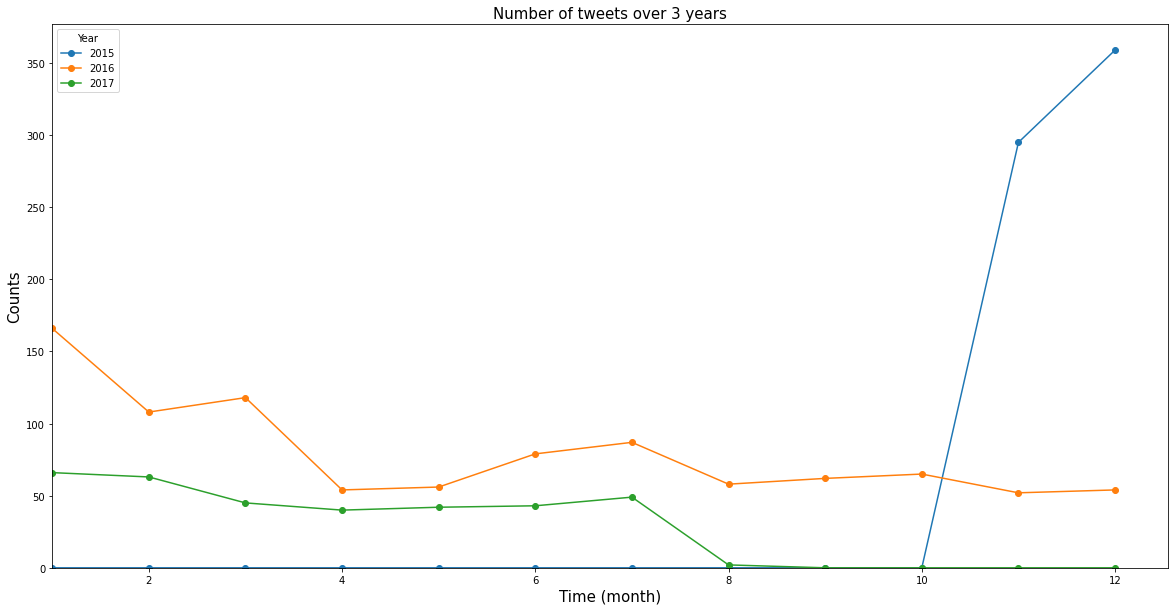

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))
annual_num_tweets.plot(kind='line', ax=ax, xlim=1, ylim=0, style='o-', use_index=True)
ax.set_xlabel('Time (month)', fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_title("Number of tweets over 3 years", fontsize=15)
plt.legend(title='Year')
plt.show()

As expected both November and December 2015 have the highest number of tweets tweeted. Both 2016 and 2017 tweets were averaging between 45 and 80 tweets.

Extended analysis of the number of tweets but now using year_month to track the progress

In [65]:
standard_group_year_month = df_clean.groupby('year_month')
num_of_tweet_per_month = standard_group_year_month['tweet_id'].count()
num_of_tweet_per_month

year_month
2015-11    295
2015-12    359
2016-01    166
2016-02    108
2016-03    118
2016-04     54
2016-05     56
2016-06     79
2016-07     87
2016-08     58
2016-09     62
2016-10     65
2016-11     52
2016-12     54
2017-01     66
2017-02     63
2017-03     45
2017-04     40
2017-05     42
2017-06     43
2017-07     49
2017-08      2
Name: tweet_id, dtype: int64

Using a line chart to virtualize the above

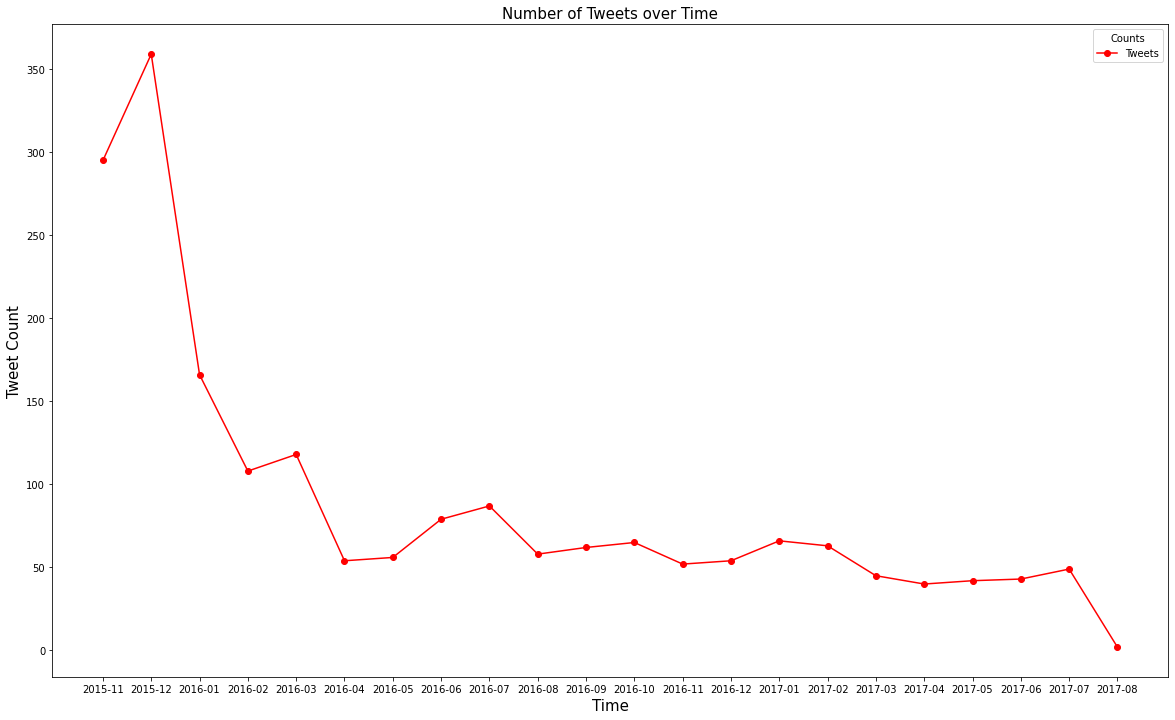

In [66]:
fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(num_of_tweet_per_month.index, num_of_tweet_per_month, 'ro-', label='Tweets')
ax.set_xlabel('Time', fontsize=15)
ax.set_ylabel('Tweet Count', fontsize=15)
ax.set_title('Number of Tweets over Time', fontsize=15)
ax.legend(title='Counts')
plt.show()

There was a huge drop in the number of tweets tweeted from the year 2015 December to 2017 July.

3. What is the average retweet_count, favorite_count, and followers_count per month?

In [67]:
engagement_per_month = standard_group_year_month['retweet_count', 'favorite_count', 'followers_count'].mean()
engagement_per_month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,retweet_count,favorite_count,followers_count
year_month,,,
2015-11,439.169492,1083.942373,9.372626e+06
2015-12,1195.994429,2992.724234,9.372635e+06
2016-01,1221.716867,3415.963855,9.372663e+06
2016-02,1304.018519,3722.888889,9.372589e+06
2016-03,1316.669492,3900.923729,9.372589e+06
2016-04,1292.759259,4051.240741,9.372632e+06
2016-05,1784.535714,5386.000000,9.372607e+06
2016-06,3576.050633,9164.075949,9.372659e+06
2016-07,2017.517241,6046.862069,9.372608e+06


The numbers are trending upwards and not showing signs of stopping. The WeRateDogs page found their niche.

Visualising average number of retweets over time.

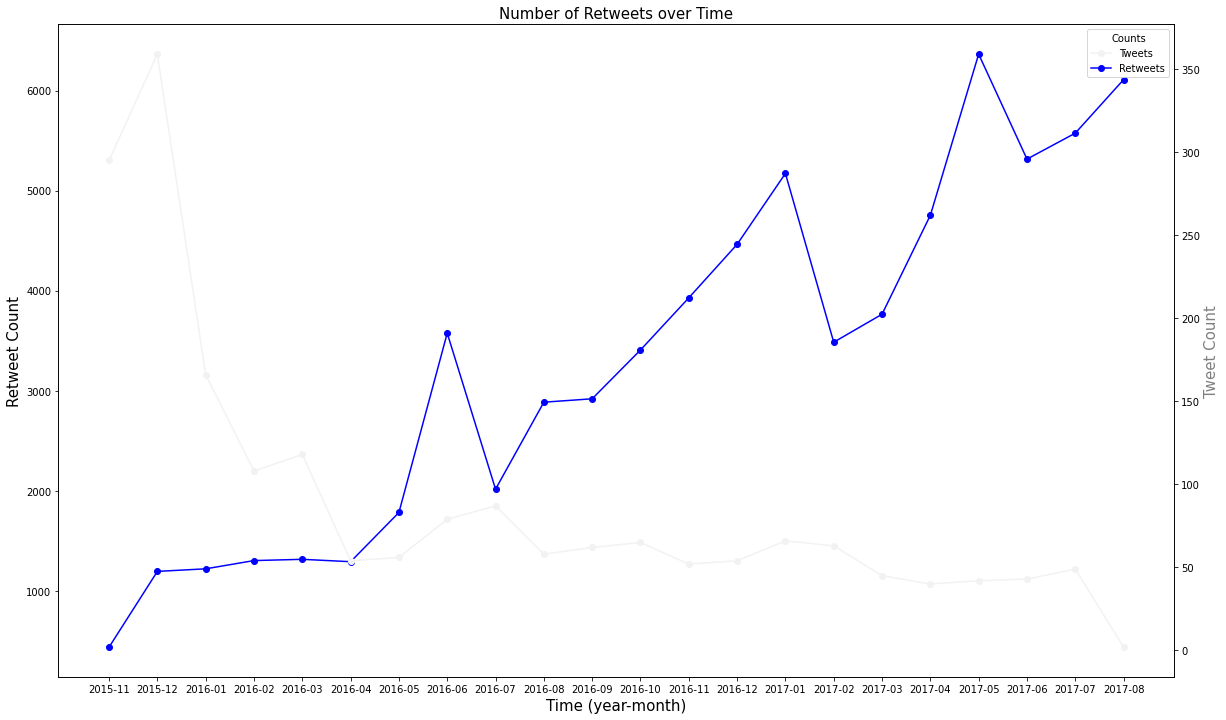

In [68]:
def draw_two_lines(data:pd.DataFrame, label:str, style:str, ylabel:str, title:str):
    fig, ax = plt.subplots(figsize=(20, 12))
    ax2 = ax.twinx()
    track_line, = ax.plot(num_of_tweet_per_month.index, data, style, label=label)
    freq_line, = ax2.plot(num_of_tweet_per_month.index, num_of_tweet_per_month, 'o-', color='0.95',label='Tweets')
    ax.set_xlabel('Time (year-month)', fontsize=15)
    ax2.set_ylabel('Tweet Count', color='0.5', fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax2.set_title(title, fontsize=15)
    ax.legend(handles=[freq_line, track_line], title='Counts')
    plt.show()

draw_two_lines(engagement_per_month.retweet_count, label='Retweets', style='bo-', ylabel='Retweet Count', title='Number of Retweets over Time')

April 2016 we see a sharp jump in the number of retweets followed by a sharp up momentum.

Visualising average number of Favorited tweets over time.

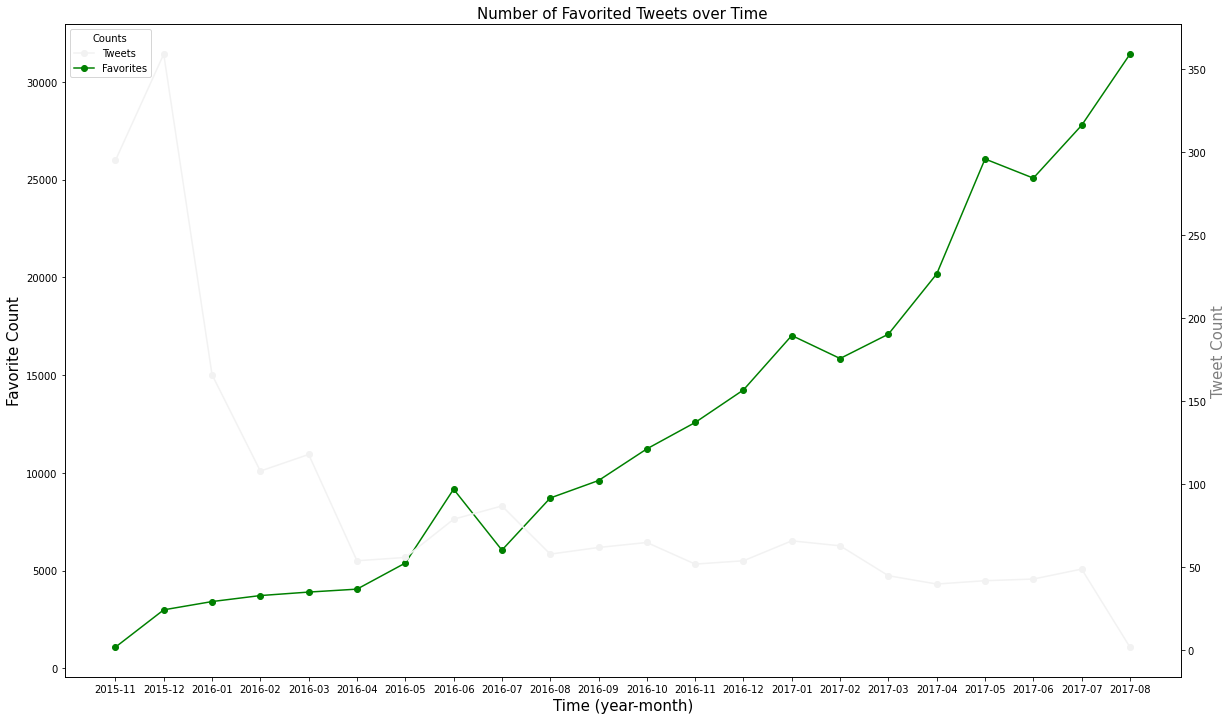

In [69]:
draw_two_lines(engagement_per_month.favorite_count, label='Favorites', style='go-', ylabel='Favorite Count', title='Number of Favorited Tweets over Time')

The number of favourited tweets are trending in a study uptrend. Showing huge momentum between 2016 April and June 2016.

There's a positive correlation between the two. With the retweet count showing big spikes.

4. What is the correlation between retweet_count, and favorite_count.

In [70]:
df_clean_sliced = engagement_per_month.loc[: , ['retweet_count', 'favorite_count', 'followers_count']]
corr = df_clean_sliced.corr()
corr

,retweet_count,favorite_count,followers_count
retweet_count,1.000000,0.954236,-0.368828
favorite_count,0.954236,1.000000,-0.519108
followers_count,-0.368828,-0.519108,1.000000


Using the Pearson method of correlation, I found that there is a positive 0.95 correlation between retweet_count, and the favorite_count meaning when one goes up..the other will too.

Visualising Retweets vs Favourites.

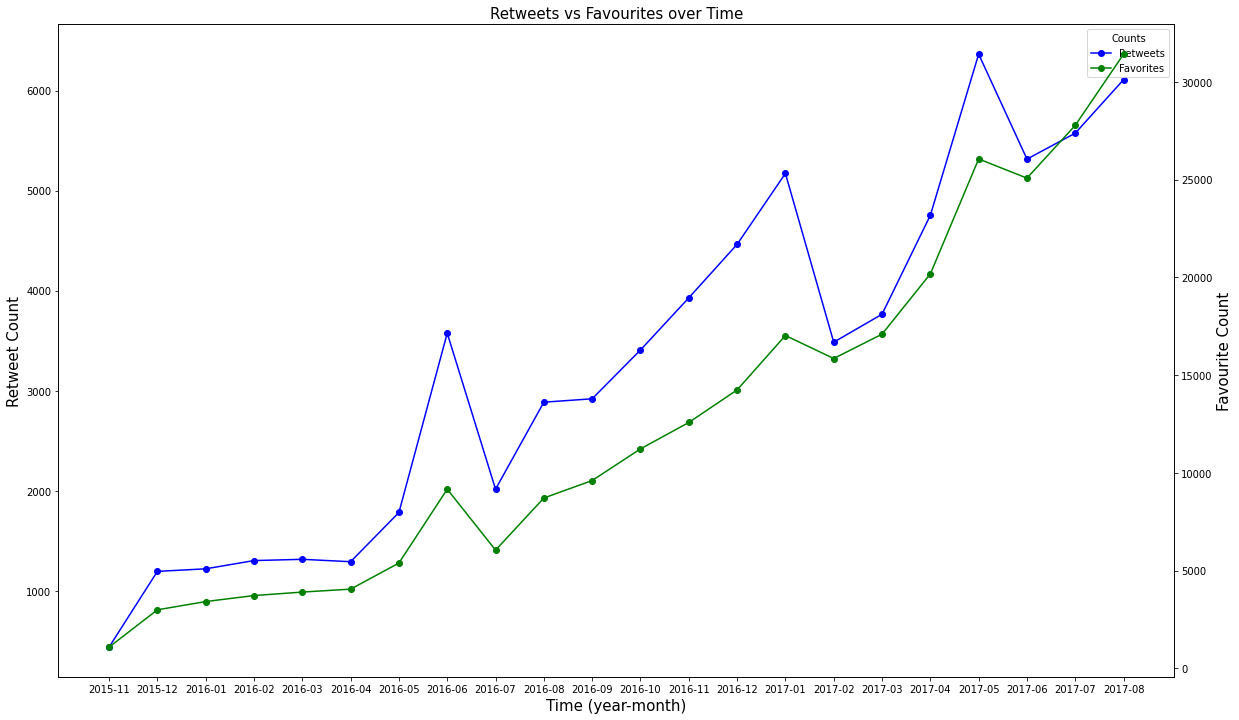

In [71]:
fig, ax = plt.subplots(figsize=(20, 12))
retweeet_line, = ax.plot(num_of_tweet_per_month.index, engagement_per_month.retweet_count, 'bo-', label='Retweets')
ax2 = ax.twinx()
fav_line, = ax2.plot(num_of_tweet_per_month.index, engagement_per_month.favorite_count, 'go-', label='Favorites')
ax.set_xlabel('Time (year-month)', fontsize=15)
ax.set_ylabel('Retweet Count', fontsize=15)
ax2.set_ylabel('Favourite Count', fontsize=15)
ax.set_title('Retweets vs Favourites over Time', fontsize=15)
ax.legend(handles=[retweeet_line, fav_line], title='Counts')
plt.show()

Investigating Tweets on, before and after April 2016.

In [72]:
df_april_2016 = df_clean.query("year_month == '2016-04' & p1_dog == True")
df_april_2016.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year_month,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
863,726224900189511680,2016-04-30 01:41:23+00:00,Twitter for iPhone,I'm getting super heckin frustrated with you a...,https://twitter.com/dog_rates/status/726224900...,9.0,10.0,NaN,2016-04,NaN,...,1,Standard Poodle,0.261112,True,Cocker Spaniel,0.094785,True,Bucket,0.069946,False
864,725842289046749185,2016-04-29 00:21:01+00:00,Twitter for iPhone,This is Colby. He's currently regretting all t...,https://twitter.com/dog_rates/status/725842289...,12.0,10.0,Colby,2016-04,NaN,...,1,Toy Poodle,0.420463,True,Miniature Poodle,0.132640,True,Chesapeake Bay Retriever,0.121523,True
865,725786712245440512,2016-04-28 20:40:11+00:00,Twitter for iPhone,Say hello to Lillie. She's a Rutabagan Floofem...,https://twitter.com/dog_rates/status/725786712...,11.0,10.0,Lillie,2016-04,pupper,...,1,Chow,0.335761,True,Samoyed,0.167173,True,Kuvasz,0.145715,True
866,725729321944506368,2016-04-28 16:52:08+00:00,Twitter for iPhone,This is Lola. She's a Butternut Splishnsplash....,https://twitter.com/dog_rates/status/725729321...,12.0,10.0,Lola,2016-04,NaN,...,1,Boxer,0.599076,True,Bull Mastiff,0.177318,True,French Bulldog,0.141461,True
867,724983749226668032,2016-04-26 15:29:30+00:00,Twitter for iPhone,This is Fred-Rick. He dabbles in parkour. The ...,https://twitter.com/dog_rates/status/724983749...,12.0,10.0,Fred,2016-04,NaN,...,1,Golden Retriever,0.675750,True,Great Pyrenees,0.095168,True,Cocker Spaniel,0.076043,True


5. Which dog breed was posted the most on April 2016.

In [73]:
df_april_2016.p1.value_counts().to_frame()

,p1
Golden Retriever,9
Pomeranian,3
Samoyed,3
Siberian Husky,2
Dandie Dinmont,2
Pembroke,2
Chihuahua,2
Labrador Retriever,2
Malamute,2
Boxer,2


In [80]:
df_april_2016.p1.value_counts().to_frame().sum()

p1    45
dtype: int64

The Golden Retriever dog breed was the one most posted in April 2016 with a total of 9 tweets.

Visualising the findings.

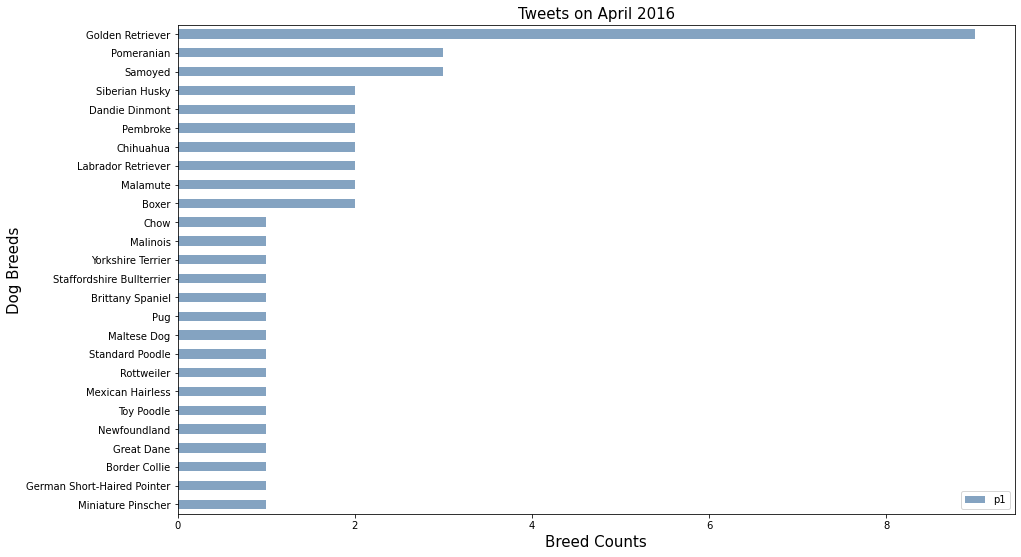

In [74]:
fig, ax = plt.subplots(figsize=(15, 9))
track_line = df_april_2016.p1.value_counts().to_frame().sort_values('p1').plot(label='Dog Breeds',kind='barh', ax=ax, color=(0.2, 0.4, 0.6, 0.6))
ax.set_xlabel('Breed Counts', fontsize=15)
ax.set_ylabel('Dog Breeds', fontsize=15)
ax.set_title('Tweets on April 2016', fontsize=15)
# ax.legend(handles=[track_line])
plt.show()

The Golden Retriever showed a high 9 total number of posts and with the Pomeranian and Samoyed breed being posted 6 times split between them.

Dog breed posted the most before April 2016.

In [75]:
before = df_clean.query("year_month < '2016-04' & p1_dog == True").p1.value_counts().to_frame()
before.head(10)

,p1
Chihuahua,54
Golden Retriever,48
Labrador Retriever,41
Pug,38
Pembroke,37
Pomeranian,23
Toy Poodle,22
Samoyed,17
Shih-Tzu,16
Maltese Dog,15


I found that between 2015 December - 2016 March we found that the Chihuahua breed was most posted with 54 tweets and the Golden Retriever being second with 48 tweets. That's a 6 tweets difference.

Visualising the findings.

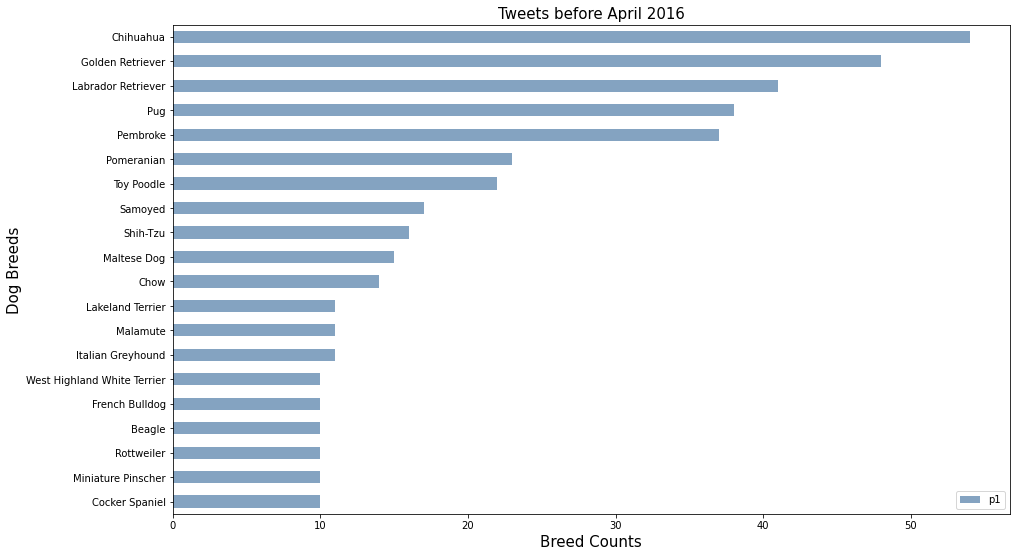

In [76]:
fig, ax = plt.subplots(figsize=(15, 9))
track_line = before.query("p1 > 9").sort_values('p1').plot(kind='barh', ax=ax, color=(0.2, 0.4, 0.6, 0.6), label='Dog Breeds')
ax.set_xlabel('Breed Counts', fontsize=15)
ax.set_ylabel('Dog Breeds', fontsize=15)
ax.set_title('Tweets before April 2016', fontsize=15)
plt.show()

The Golden Retriever follows closely to the number of tweets per month.

Dog breed was posted the most after April 2016.

In [77]:
after = df_clean.query("year_month > '2016-04' & p1_dog == True").p1.value_counts().to_frame()
after.head(10)

,p1
Golden Retriever,80
Pembroke,49
Labrador Retriever,48
Chow,26
Chihuahua,22
Samoyed,19
Cocker Spaniel,17
Malamute,16
German Shepherd,15
French Bulldog,15


The Golden Retriever was found to be tweeted 80 times after April 2016 with the previous lead Chihuahua being posted 22 times. The Pembroke breed was tweeted 49 times; 31 tweets behind the Golden Retriever.

Visualising the findings.

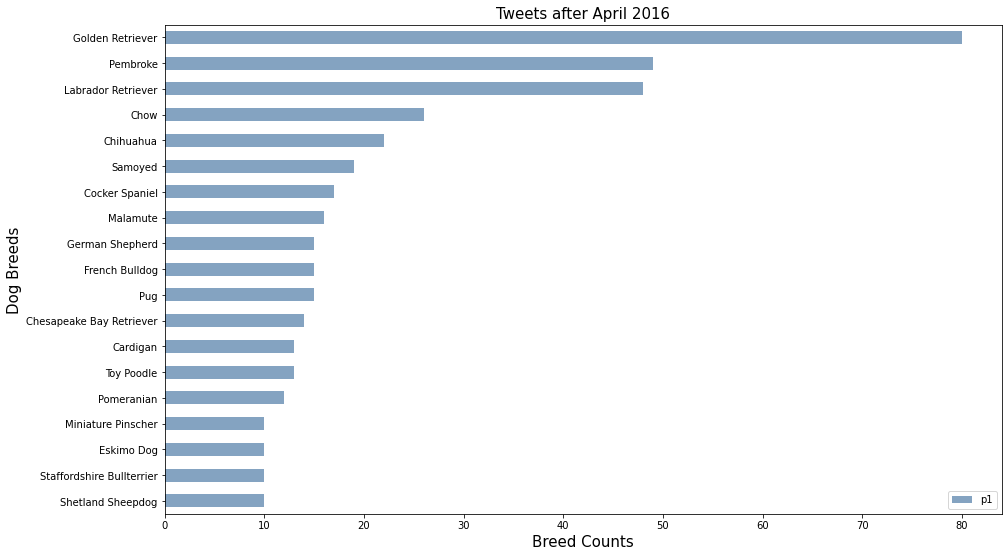

In [78]:
fig, ax = plt.subplots(figsize=(15, 9))
track_line = after.query("p1 > 9").sort_values('p1').plot(label='Dog Breeds',kind='barh', ax=ax, color=(0.2, 0.4, 0.6, 0.6))
ax.set_xlabel('Breed Counts', fontsize=15)
ax.set_ylabel('Dog Breeds', fontsize=15)
ax.set_title('Tweets after April 2016', fontsize=15)
plt.show()

The Golden Retriever might have save the WeRateDogs twitter page as from the dataset we learned the from April 2016 the page posted a lot of tweets rating the Golden Retrieve breed and thus increasing the engagement with their followers as the number of retweet and favoured tweet kept rising since.